## 图像数据整理

### 安装依赖

In [30]:
!pip install numpy pandas matplotlib seaborn plotly requests tqdm opencv-python pillow wandb tensorboard

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
     ---------------------------------------- 0.0/15.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.2 MB ? eta -:--:--
     --------------------------------------- 0.0/15.2 MB 325.1 kB/s eta 0:00:47
     --------------------------------------- 0.0/15.2 MB 325.1 kB/s eta 0:00:47
     --------------------------------------- 0.0/15.2 MB 325.1 kB/s eta 0:00:47
     --------------------------------------- 0.0/15.2 MB 325.1 kB/s eta 0:00:47
     --------------------------------------- 0.1/15.2 MB 192.5 kB/s eta 0:01:19
     --------------------------------------- 0.1/15.2 MB 206.9 kB/s eta 0:01:14
     --------------------------------------- 0.1/15.2 MB 249.8 kB/s eta 0:01:01
     --------------------------------------- 0.1/15.2 MB 249.8 kB/s eta 0:01:01
     --------------------------------------- 0.1/15.2 MB 249.8 kB/s eta 0:01:01
     --------------------------------------- 0.1/15.2 MB 225.3 kB/s eta 0:01:08


In [9]:
import os
import shutil
import random
import cv2
import math
import requests

import pandas as pd
import numpy as np

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

# 忽略烦人的红色提示
import warnings
warnings.filterwarnings("ignore")

# windows操作系统
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [3]:
dataset_path = '../ISIC/ISIC-2017_Training_Data/'

In [4]:
# 删除无法读取的图片文件
for skin in tqdm(os.listdir(dataset_path)):
    file_path = os.path.join(dataset_path, skin)
    img = cv2.imread(file_path)
    if img is None:
        print(file_path, '读取错误，删除')
        os.remove(file_path)

  0%|          | 8/4001 [00:00<01:41, 39.20it/s]

../ISIC/ISIC-2017_Training_Data/ISIC-2017_Training_Data_metadata.csv 读取错误，删除


100%|██████████| 4001/4001 [05:33<00:00, 12.00it/s]


In [19]:
# 可视化图片大小分布
df = pd.DataFrame()
for skin in tqdm(os.listdir(dataset_path)): # 遍历每个类别
    try:
        file = os.path.join(dataset_path, skin)
        img = cv2.imread(file)
        df = df.append({'类别':'unknow', '文件名':skin, '图像宽':img.shape[1], '图像高':img.shape[0]}, ignore_index=True)
    except:
        print(skin, '读取错误')


  0%|          | 0/4000 [00:00<?, ?it/s]C:\Users\pc\AppData\Local\Temp\ipykernel_7232\1872658438.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'类别':'unknow', '文件名':skin, '图像宽':img.shape[1], '图像高':img.shape[0]}, ignore_index=True)

  0%|          | 1/4000 [00:00<09:56,  6.71it/s]C:\Users\pc\AppData\Local\Temp\ipykernel_7232\1872658438.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'类别':'unknow', '文件名':skin, '图像宽':img.shape[1], '图像高':img.shape[0]}, ignore_index=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_7232\1872658438.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'类别':'unknow', '文件名':skin, '图像宽':img.shape[1], '图像高':img.shape[0]}, ignore_index=True)
C:\User

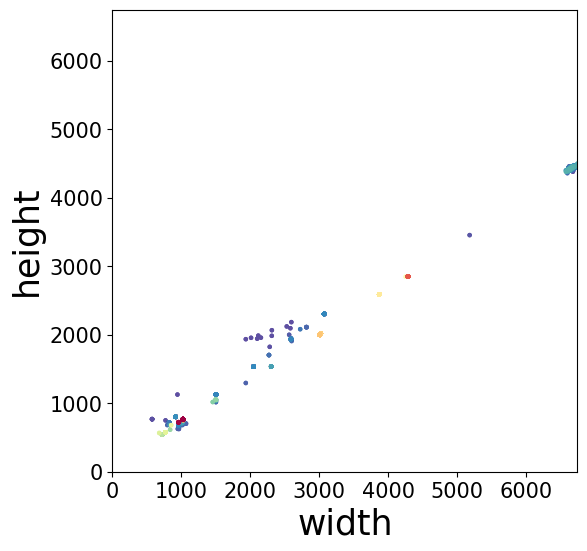

In [22]:
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm

x = df['图像宽']
y = df['图像高']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

plt.figure(figsize=(6,6))
# plt.figure(figsize=(12,12))
plt.scatter(x, y, c=z,  s=5, cmap='Spectral_r')
# plt.colorbar()
# plt.xticks([])
# plt.yticks([])

plt.tick_params(labelsize=15)

xy_max = max(max(df['图像宽']), max(df['图像高']))
plt.xlim(xmin=0, xmax=xy_max)
plt.ylim(ymin=0, ymax=xy_max)

plt.ylabel('height', fontsize=25)
plt.xlabel('width', fontsize=25)

# plt.savefig('图像尺寸分布.pdf', dpi=120, bbox_inches='tight')

plt.show()

In [26]:

N = 16
n = math.floor(np.sqrt(N))

images = []
for each_img in os.listdir(dataset_path)[:N]:
    img_path = os.path.join(dataset_path, each_img)
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    images.append(img_rgb)

C:\Users\pc\AppData\Local\Temp\ipykernel_7232\2422735327.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


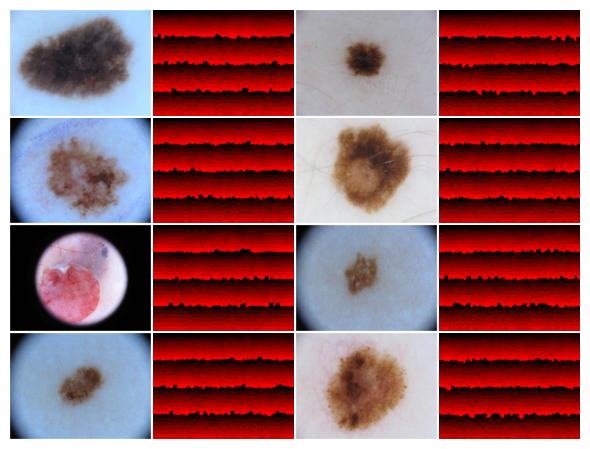

In [27]:
fig = plt.figure(figsize=(6, 6))
grid = ImageGrid(fig, 111,  # 类似绘制子图 subplot(111)
                 nrows_ncols=(n, n),  # 创建 n 行 m 列的 axes 网格
                 axes_pad=0.02,  # 网格间距
                 share_all=True
                 )

# 遍历每张图像
for ax, im in zip(grid, images):
    ax.imshow(im)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [5]:
train_csv = pd.read_csv('../ISIC/ISIC-2017_Training_Part3_GroundTruth.csv')
test_csv = pd.read_csv('../ISIC/ISIC-2017_Test_v2_Part3_GroundTruth.csv')

In [17]:
if not os.path.exists('dataset'):
    os.mkdir('dataset')

if not os.path.exists('dataset/train'):
    os.mkdir('dataset/train')
if not os.path.exists('dataset/train/melanoma'):
    os.mkdir('dataset/train/melanoma')
if not os.path.exists('dataset/train/seborrheic_keratosis'):
    os.mkdir('dataset/train/seborrheic_keratosis')
if not os.path.exists('train/benign'):
    os.mkdir('dataset/train/benign')

if not os.path.exists('dataset/test'):
    os.mkdir('dataset/test')
if not os.path.exists('dataset/test/melanoma'):
    os.mkdir('dataset/test/melanoma')
if not os.path.exists('dataset/test/seborrheic_keratosis'):
    os.mkdir('dataset/test/seborrheic_keratosis')
if not os.path.exists('dataset/test/benign'):
    os.mkdir('dataset/test/benign')

In [24]:
# 把训练数据集按文件夹存放
for i in tqdm(range(len(train_csv))):
    path = os.path.join('../ISIC/ISIC-2017_Training_Data/', train_csv.image_id[i] + '.jpg')
    if train_csv.melanoma[i] > 0:
        old_dir = path
        new_dir = './dataset/train/melanoma/' + train_csv.image_id[i] + '.jpg'
        shutil.move(old_dir, new_dir)
    elif train_csv.seborrheic_keratosis[i] > 0:
        old_dir = path
        new_dir = './dataset/train/seborrheic_keratosis/' + train_csv.image_id[i] + '.jpg'
        shutil.move(old_dir, new_dir)
    else:
        old_dir = path
        new_dir = './dataset/train/benign/' + train_csv.image_id[i] + '.jpg'
        shutil.move(old_dir, new_dir)

# 把测试数据集按文件夹存放
for i in tqdm(range(len(train_csv))):
    path = os.path.join('../ISIC/ISIC-2017_Test_v2_Data/', train_csv.image_id[i] + '.jpg')
    if train_csv.melanoma[i] > 0:
        old_dir = path
        new_dir = './dataset/test/melanoma/' + train_csv.image_id[i] + '.jpg'
        shutil.move(old_dir, new_dir)
    elif train_csv.seborrheic_keratosis[i] > 0:
        old_dir = path
        new_dir = './dataset/test/seborrheic_keratosis/' + train_csv.image_id[i] + '.jpg'
        shutil.move(old_dir, new_dir)
    else:
        old_dir = path
        new_dir = './dataset/test/benign/' + train_csv.image_id[i] + '.jpg'
        shutil.move(old_dir, new_dir)


100%|██████████| 2000/2000 [00:00<00:00, 4164.67it/s]


In [21]:
train_csv.melanoma[2] > 0

True

In [6]:
train_csv.head()

,image_id,melanoma,seborrheic_keratosis
0,ISIC_0000000,0.0,0.0
1,ISIC_0000001,0.0,0.0
2,ISIC_0000002,1.0,0.0
3,ISIC_0000003,0.0,0.0
4,ISIC_0000004,1.0,0.0


In [7]:
train_csv.image_id

KeyError: 1